# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the UCI Link, "The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts"

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<hr>
<hr>
<p>
<b>"Unknown" values in categorical columns should be considered missing.</b>

<ul>
<li>job</li>
    <li>marital</li>
    <li>education</li>
    <li>default</li>
    <li>housing</li>
    <li>loan</li>    
</ul>


<b>A few columns should be one-hot encoded:</b>

<ul>
    <li>month</li>
    <li>day_of_week</li>
    <li>marital</li>
    <li>job</li>
    <li>education</li>
    <li>loan</li>    
</ul>

Duration should likely be discarded as recommended to achieve a realistic predictive model, as duration cannot be known <b><i>BEFORE</b></i> a call commences.
</p>
<hr>
<hr>

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<hr>
<hr>
The objective of this task is to predict whether a client will subscribe to a term deposit based on their demographic, financial, and contact-related information. By accurately predicting the likelihood of a subscription, the bank can:

<ul>
    <li>Improve Resource Allocation</li>
    <li>Optimize Marketing Efforts</li>
    <li>Enhance Campaign Effectiveness</li>
    <li>Maximize Return on Investment</li>
</ul>

This task aims to use machine learning models to gain actionable insights, improve decision-making, and enhance the overall efficiency of the bank’s marketing campaigns.
<hr>
<hr>

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [28]:
data = df
data.replace('unknown', pd.NA, inplace=True)

# Drop rows with NaN values in key columns
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data_cleaned = data.dropna(subset=columns_to_check)

# Drop the 'duration' column for realistic predictive modeling
data_cleaned = data_cleaned.drop('duration', axis=1)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Display summary of the cleaned dataset
cleaned_info = data_cleaned.info()
encoded_info = data_encoded.info()

# Display the first few rows of the cleaned and encoded dataset
data_cleaned_head = data_cleaned.head()
data_encoded_head = data_encoded.head()

cleaned_info, encoded_info, data_cleaned_head, data_encoded_head

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null  floa

(None,
 None,
    age        job  marital            education default housing loan  \
 0   56  housemaid  married             basic.4y      no      no   no   
 2   37   services  married          high.school      no     yes   no   
 3   40     admin.  married             basic.6y      no      no   no   
 4   56   services  married          high.school      no      no  yes   
 6   59     admin.  married  professional.course      no      no   no   
 
      contact month day_of_week  campaign  pdays  previous     poutcome  \
 0  telephone   may         mon         1    999         0  nonexistent   
 2  telephone   may         mon         1    999         0  nonexistent   
 3  telephone   may         mon         1    999         0  nonexistent   
 4  telephone   may         mon         1    999         0  nonexistent   
 6  telephone   may         mon         1    999         0  nonexistent   
 
    emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
 0           1.1

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # All columns except the target
y = data_encoded['y_yes']  # Target column

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Output sizes of train and test sets
train_size = X_train.shape, y_train.shape
test_size = X_test.shape, y_test.shape

train_size, test_size

(((21341, 46), (21341,)), ((9147, 46), (9147,)))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
# Add these to exclude annoying warnings
from sklearn.exceptions import UndefinedMetricWarning 
import warnings

# Baseline Model: Dummy Classifier
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

# Predict on test set
baseline_preds = baseline_model.predict(X_test)

# Evaluate baseline model
baseline_accuracy = accuracy_score(y_test, baseline_preds)
baseline_roc_auc = roc_auc_score(y_test, baseline_preds)
baseline_report = classification_report(y_test, baseline_preds, zero_division=0)

# Display results
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"Baseline ROC-AUC: {baseline_roc_auc:.2f}")
print("\nClassification Report:")
print(baseline_report)

Baseline Accuracy: 0.87
Baseline ROC-AUC: 0.50

Classification Report:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93      7989
        True       0.00      0.00      0.00      1158

    accuracy                           0.87      9147
   macro avg       0.44      0.50      0.47      9147
weighted avg       0.76      0.87      0.81      9147



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress annoying warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=3000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
lr_preds = lr_model.predict(X_test)
proba_preds = lr_model.predict_proba(X_test)[:, 1]



### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Accuracy: 0.89
Logistic Regression ROC-AUC: 0.80

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      7989
        True       0.64      0.26      0.37      1158

    accuracy                           0.89      9147
   macro avg       0.77      0.62      0.65      9147
weighted avg       0.87      0.89      0.87      9147



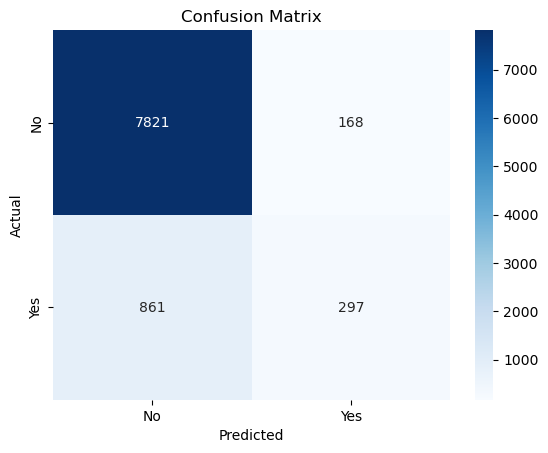

In [54]:
# Evaluate Logistic Regression Model
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_roc_auc = roc_auc_score(y_test, proba_preds)
lr_report = classification_report(y_test, lr_preds)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Logistic Regression ROC-AUC: {lr_roc_auc:.2f}")
print("\nClassification Report:")
print(lr_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<hr>
<hr>
<ul>
<li>The area under the curve is 0.80, which is good, but not great performance.  This is the model's ability to distinguish between "yes" and "no" answers</li>
    <li>The model predicted 89% of all test samples correctly, including both answer types</li>
    <li>True negatives (no classified as no) were 7821</li>
    <li>False positives (no incorrectly classified as yes) were 168</li>
    <li>False negatives (yes incorrectly classified as no) were 861</li>
    <li>True positives (yes correctly classified as yes) were 297</li>
</ul>
<hr>
<hr>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

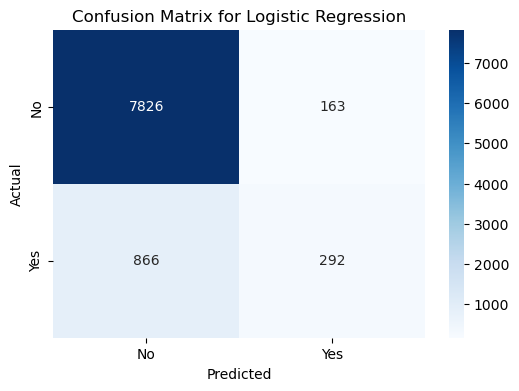

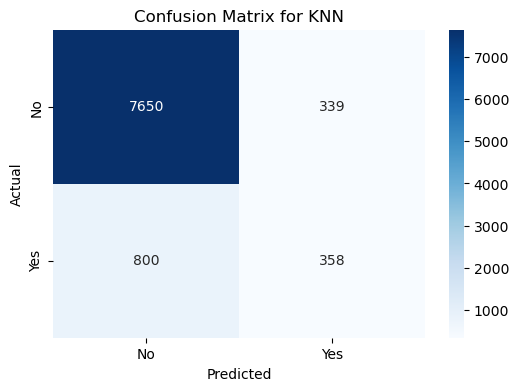

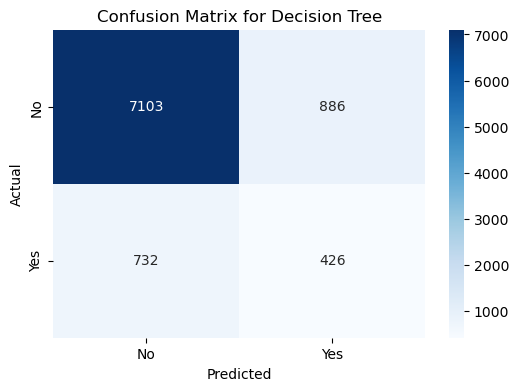

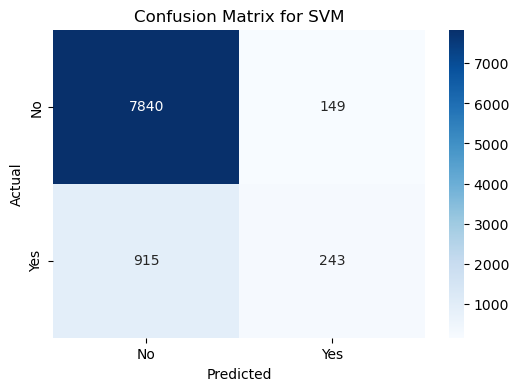

                 Model  Train Time (s)  Train Accuracy (%)  Test Accuracy (%)
0  Logistic Regression          1.4920               88.89              88.75
1                  KNN          0.0110               90.58              87.55
2        Decision Tree          0.1017               99.54              82.31
3                  SVM         39.2769               88.63              88.37


In [55]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Load and preprocess the dataset
file_path = 'data/bank-additional-full.csv'  # Update with the correct dataset path
data = pd.read_csv(file_path, sep=';')

data.replace('unknown', pd.NA, inplace=True)
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data_cleaned = data.dropna(subset=columns_to_check)
data_cleaned = data_cleaned.drop('duration', axis=1)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Define features and target
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize models with default settings
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Store results
results = []
confusion_matrices = {}

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)  # Fit the model
    train_time = time.time() - start_time

    # Compute accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Predict on the test set and store confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = conf_matrix

    # Append results to the results list
    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 4),
        "Train Accuracy (%)": round(train_accuracy * 100, 2),
        "Test Accuracy (%)": round(test_accuracy * 100, 2)
    })

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    # uncomment to show matrices
    plt.show() 

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

# Display all confusion matrices
# print(confusion_matrices)

<hr>
<hr>

Logistic Regression appears to produce the best Test Accuracy followed by SVM.  Despite having nearly perfect Training accuracy, Decision Tree's test accuracy is the lowest which suggests overfitting.

With this in mind, KNN seems to fit much faster than LR (0.011 vs 1.492, respectively), with relatively high accuracy (87.55 vs 88.75).  Because of it's speed, it may actually be the best model to use depending on how critical precision is.

<hr>
<hr>

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

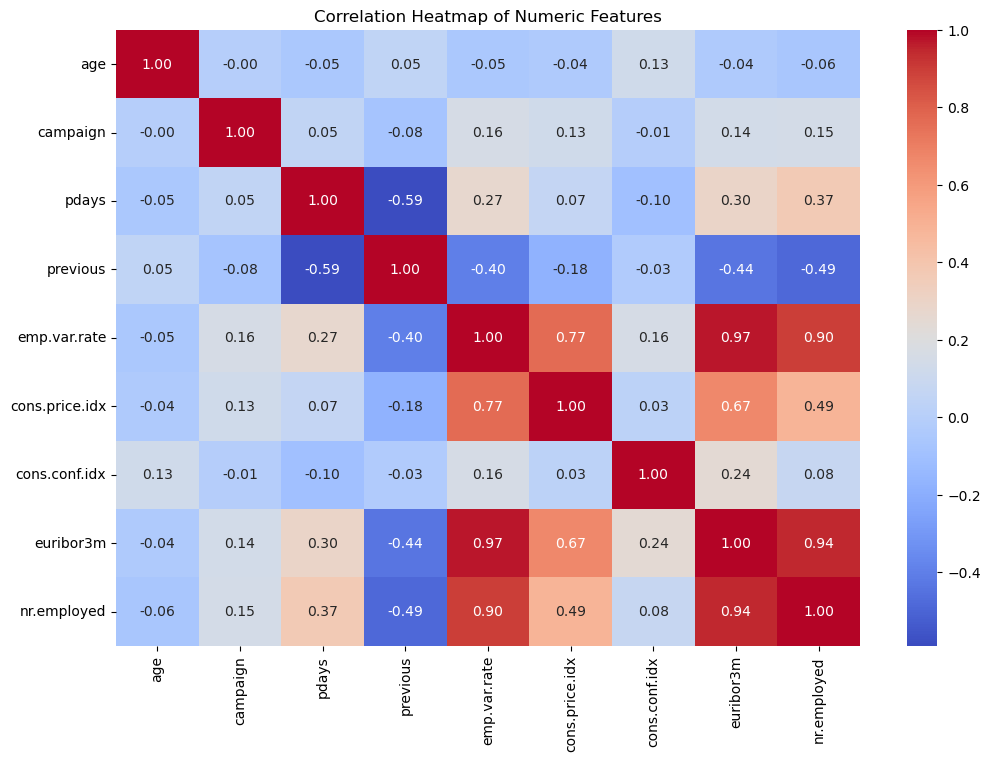

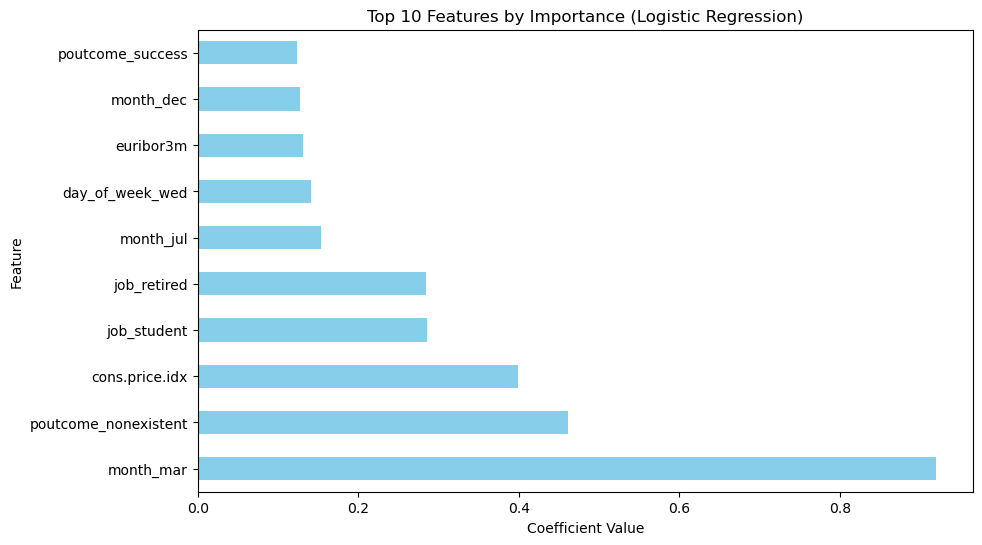

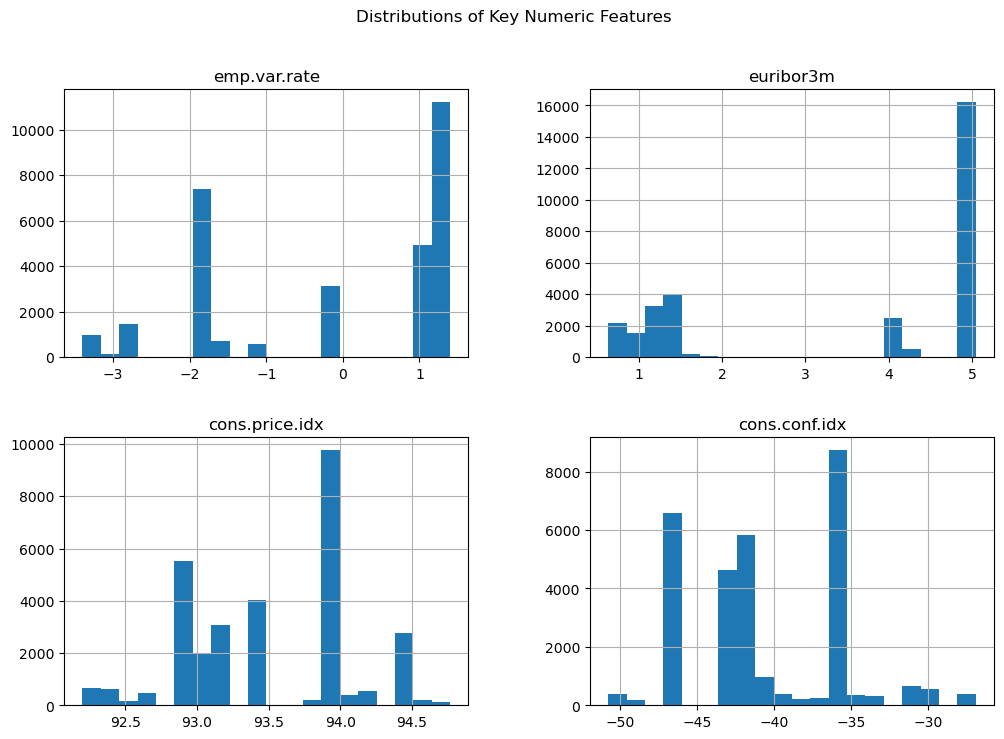

In [68]:
# Feature Exploration

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Reload dataset to start clean
file_path = 'data/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

# Data cleaning and encoding
data.replace('unknown', pd.NA, inplace=True)
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data_cleaned = data.dropna(subset=columns_to_check)
data_cleaned = data_cleaned.drop('duration', axis=1)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Define features and target
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Logistic Regression for Feature Importance
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Feature Importance Analysis
feature_importance = pd.Series(lr_model.coef_[0], index=X.columns).sort_values(ascending=False)

# Correlation Heatmap for numeric features
numeric_features = X.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Top 10 Features by Importance
plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind="barh", color="skyblue")
plt.title("Top 10 Features by Importance (using Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Explore distributions of a few key features
key_features = ["emp.var.rate", "euribor3m", "cons.price.idx", "cons.conf.idx"]
X[key_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Key Numeric Features")
plt.show()

<hr>
<hr>

<b>Correlation Heatmap:</b>

<p>
The heatmap shows relationships among numeric features. High correlation between euribor3m and nr.employed, for example, might indicate redundancy and could potentially be simplified.  This highlights the relationship between age and the 3 month rate (euribor3m), which are top features.  
</p>

<b>Top Features (Logistic Regression Coefficients):</b>

<p>
The most predictive features include economic indicators like emp.var.rate and euribor3m, along with some campaign-related variables like poutcome_success.  Interestingly the "nonexistent" marker for poutcome seems to be key.
</p>

<b>Distributions of Key Features:</b>

<p>
Features like emp.var.rate and euribor3m are well-distributed, but cons.conf.idx and cons.price.idx show less variability, which might limit their predictive power.
</p>
<hr>
<hr>

In [1]:
# Hyperparameter Tuning - instantiating data set from scratch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

# Reload dataset to start clean
file_path = 'data/bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')

# Data cleaning and encoding
data.replace('unknown', pd.NA, inplace=True)
columns_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data_cleaned = data.dropna(subset=columns_to_check)
data_cleaned = data_cleaned.drop('duration', axis=1)
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Define features and target
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



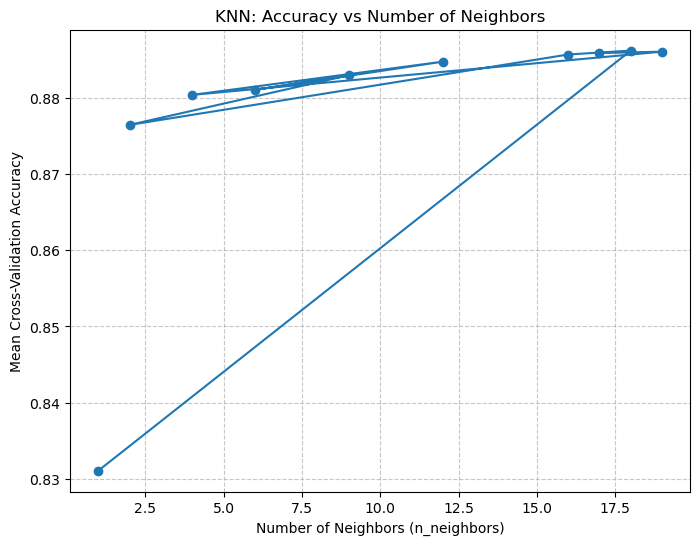

Best Parameters for KNN: {'n_neighbors': 18}
Best Cross-Validation Accuracy for KNN: 0.8861817272931443


In [3]:
# K nearest neighbors hyperparameters

from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Define KNN parameters
knn_param_grid = {'n_neighbors': range(1, 21)}
knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(), knn_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
knn_random_search.fit(X_train, y_train)

# Results for KNN
knn_results = pd.DataFrame(knn_random_search.cv_results_)

# Visualization: Accuracy vs Number of Neighbors
plt.figure(figsize=(8, 6))
plt.plot(knn_results["param_n_neighbors"], knn_results["mean_test_score"], marker="o")
plt.title("KNN: Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

# Best Parameters and Score for KNN
print("Best Parameters for KNN:", knn_random_search.best_params_)
print("Best Cross-Validation Accuracy for KNN:", knn_random_search.best_score_)

<hr>
<hr>

This indicates that n_neighbors=18 is the best parameter, achieving 88.61% accuracy.  The lower neighbors, the less accurate.  Accuracy starts to stabilize at 18 neighbors.

<hr>
<hr>

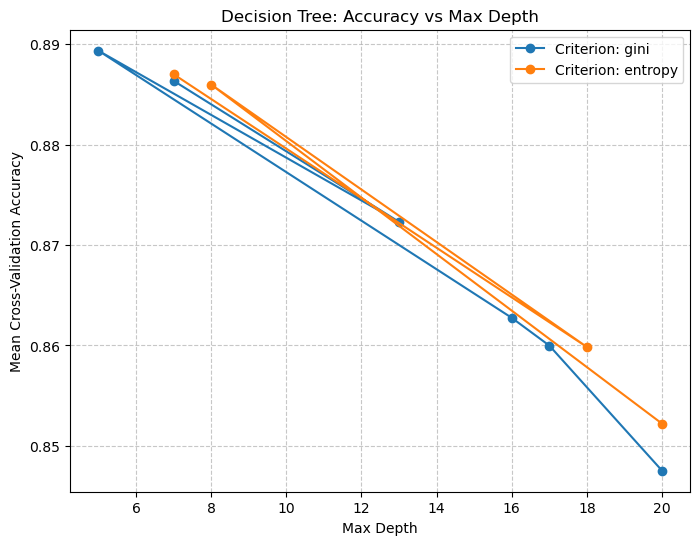

Best Parameters for Decision Tree: {'max_depth': 5, 'criterion': 'gini'}
Best Cross-Validation Accuracy for Decision Tree: 0.8893679680651448


In [5]:
# Define Decision Tree parameters
dt_param_grid = {'max_depth': range(1, 21), 'criterion': ['gini', 'entropy']}
dt_random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), dt_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
dt_random_search.fit(X_train, y_train)

# Results for Decision Tree
dt_results = pd.DataFrame(dt_random_search.cv_results_)

# Visualization: Accuracy vs Max Depth
plt.figure(figsize=(8, 6))
for criterion in dt_results["param_criterion"].unique():
    subset = dt_results[dt_results["param_criterion"] == criterion]
    plt.plot(
        subset["param_max_depth"],
        subset["mean_test_score"],
        marker="o",
        label=f"Criterion: {criterion}"
    )

plt.title("Decision Tree: Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

# Best Parameters and Score for Decision Tree
print("Best Parameters for Decision Tree:", dt_random_search.best_params_)
print("Best Cross-Validation Accuracy for Decision Tree:", dt_random_search.best_score_)

<hr>
<hr>

Gini and Entropy both achieve their highest accuracy at a max depth of 5.  Gini narrowly outperforms Entropy.  Shallower trees underfit the data, and deeper trees start to overfit the data.

<hr>
<hr>

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10}
Best Cross-Validation Accuracy for Logistic Regression: 0.8883057988078593


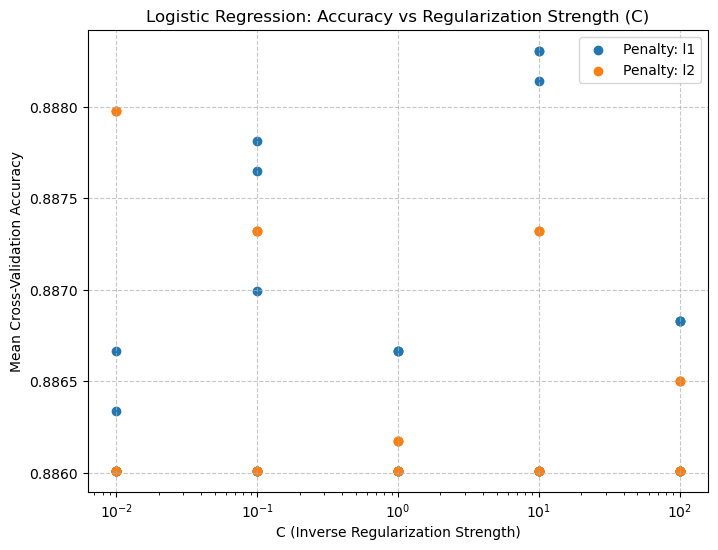

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample the dataset for faster hyperparameter tuning
X_sampled, _, y_sampled, _ = train_test_split(
    X, y, test_size=0.8, random_state=42, stratify=y
)
# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Perform Randomized Search
lr_random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    n_iter=100,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
lr_random_search.fit(X_sampled, y_sampled)

# Best Parameters and Score
print("Best Parameters for Logistic Regression:", lr_random_search.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", lr_random_search.best_score_)

# Visualization: Accuracy vs Regularization Strength (C)
lr_results = pd.DataFrame(lr_random_search.cv_results_)

plt.figure(figsize=(8, 6))
for penalty in lr_results["param_penalty"].unique():
    subset = lr_results[lr_results["param_penalty"] == penalty]
    plt.scatter(
        subset["param_C"],
        subset["mean_test_score"],
        label=f"Penalty: {penalty}",
    )

plt.title("Logistic Regression: Accuracy vs Regularization Strength (C)")
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.xscale('log')
plt.show()

<hr>
<hr>
This indicates that l1 (Lasso) is the best parameter, which max_inter=500 and 'C' = 10.   
<hr>
<hr>


Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best Cross-Validation Accuracy for SVM: 0.8860093722605874


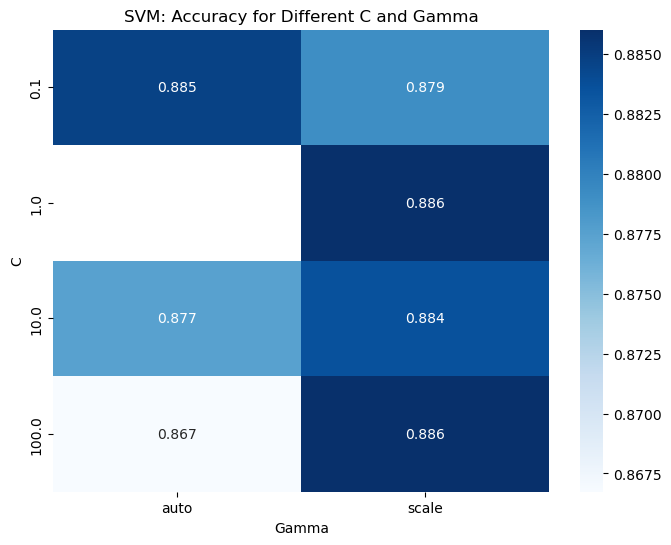

In [13]:
from sklearn.svm import SVC

# SVM Parameter Grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform Randomized Search
svm_random_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    svm_param_grid,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
svm_random_search.fit(X_sampled, y_sampled)

# Best Parameters and Score
print("Best Parameters for SVM:", svm_random_search.best_params_)
print("Best Cross-Validation Accuracy for SVM:", svm_random_search.best_score_)

# Visualization: Heatmap for C and Gamma
svm_results = pd.DataFrame(svm_random_search.cv_results_)
svm_pivot = svm_results.pivot_table(
    values="mean_test_score", index="param_C", columns="param_gamma"
)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_pivot, annot=True, fmt=".3f", cmap="Blues")
plt.title("SVM: Accuracy for Different C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()


<hr>
<hr>

We should use C=1, gamma='scale', and the rbf kernel for our final SVM model as these parameters provide the best trade-off between bias and variance.

<hr>
<hr>

##### Questions